# FINANCE DATA PROJECT

This project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2020.

### Import necessary packages

In this exploratory data analysis, we will use pandas, numpy, datetime, matplotlib, seaborn, and pandas_datareader modules. These modules are preinstalled using pip.

In [92]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data, wb
%matplotlib inline
sns.set()

### Get the stock data
Using the pandas_datareader module, we will get the information for the following banks:
- Bank of America
- CitiGroup
- Capital One
- JPMorgan Chase
- Wells Fargo
- Keycorp

In [131]:
start = datetime.datetime(2006,1,1)
end = datetime.date.today()

In [133]:
bank_stocks = yf.download("BAC C COF JPM WFC KEY", start=start, end=end, group_by='ticker')

[*********************100%***********************]  6 of 6 completed


In [134]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [139]:
ticker = ['BAC', 'C', 'COF', 'JPM', 'KEY', 'WFC']

### Take a look on the bank_stocks data.

In [140]:
bank_stocks.head()

Bank Ticker        WFC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   31.600000  31.975000  31.195000  31.900000  20.613142  11016400   
2006-01-04   31.799999  31.820000  31.365000  31.530001  20.374050  10870000   
2006-01-05   31.500000  31.555000  31.309999  31.495001  20.351437  10158000   
2006-01-06   31.580000  31.775000  31.385000  31.680000  20.470978   8403800   
2006-01-09   31.674999  31.825001  31.555000  31.674999  20.467749   5619600   

Bank Ticker        BAC                                   ...        COF  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2006-01-03   46.919998  47.180000  46.150002  47.080002  ...  84.349998   
2006-01-04   47.000000  47.240002  46.450001  46.580002  ...  85.589996   
2006-01-05   46.580002  46.830002  46.320000  46.639999  ...  86.000000   
2006-01-06   46.799999  46.910000  46.349998  46.570000  ...  85.690002   
2006-01-09   46.720001  46.970001  46.360001  46.599998  ...  86.540001   

Bank Ticker                                          C              \
Stock Info       Close  Adj Close   Volume        Open        High   
Date                                                                 
2006-01-03   86.980003  69.343208  1934000  490.000000  493.799988   
2006-01-04   86.419998  68.896751  1751500  488.600006  491.000000   
2006-01-05   86.440002  68.912682  1365100  484.399994  487.799988   
2006-01-06   86.440002  68.912682   904000  488.799988  489.000000   
2006-01-09   88.120003  70.252075  1598400  486.000000  487.399994   

Bank Ticker                                               
Stock Info          Low       Close   Adj Close   Volume  
Date                                                      
2006-01-03   481.100006  492.899994  373.704346  1537600  
2006-01-04   483.500000  483.799988  366.804901  1870960  
2006-01-05   484.000000  486.200012  368.624603  1143160  
2006-01-06   482.000000  486.200012  368.624603  1370210  
2006-01-09   483.000000  483.899994  366.880768  1680740  

[5 rows x 36 columns]

## Find the max close price for each bank's stock

Maximum closing price:

In [141]:
for tick in ticker:
    print(tick, bank_stocks[tick]['Close'].max().round(5))

BAC 54.9
C 564.09998
COF 166.28999
JPM 166.44
KEY 39.79
WFC 65.93


Minimum closing price:

In [142]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').min()

Bank Ticker
WFC     8.12
BAC     3.14
KEY     4.60
JPM    15.90
COF     8.31
C      10.20
dtype: float64

## Create a new empty DataFrame called returns. This df will contain the returns for each bank's stock. 

In [143]:
returns = pd.DataFrame()

In [144]:
for tick in ticker:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

Here is the brief overview of returns dataset.

In [145]:
returns.tail()

,BAC Return,C Return,COF Return,JPM Return,KEY Return,WFC Return
Date,,,,,,
2021-07-12,0.014735,0.014463,0.026783,0.014316,0.012395,0.005693
2021-07-13,-0.018952,-0.015409,-0.012193,-0.014873,-0.017140,-0.021060
2021-07-14,-0.025088,-0.002925,-0.024564,-0.003405,-0.003986,0.039787
2021-07-15,-0.000772,0.004107,0.009506,0.002192,0.008504,0.001112
2021-07-16,-0.023436,-0.022644,-0.017649,-0.022835,-0.040179,-0.016000


## Create a pairplot using seaborn of the returns dataframe.

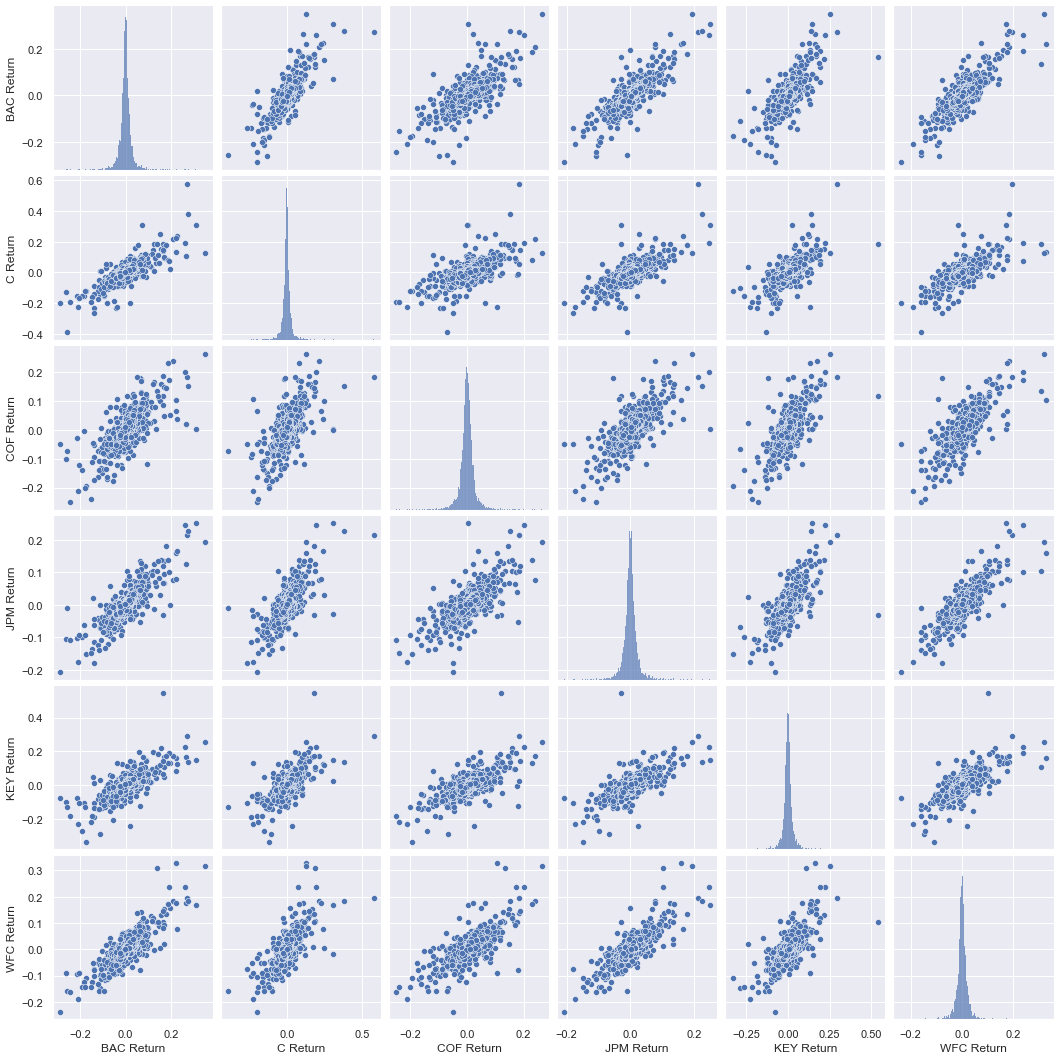

In [146]:
sns.pairplot(returns[1:])

## Using the returns dataframe, figure out on what dates each bank stock had the best and worst single day returns.

Best single day returns:

In [147]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
COF Return   2009-04-20
JPM Return   2009-01-20
KEY Return   2008-09-29
WFC Return   2009-01-20
dtype: datetime64[ns]

Worst single day returns:

In [148]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
COF Return   2009-04-09
JPM Return   2009-01-21
KEY Return   2008-10-14
WFC Return   2008-07-16
dtype: datetime64[ns]

## Take a look at the standard deviation of the returns. Which stock we classify as the riskiest over the time period? Which we would classify as the riskiest for the year 2015?

Standard Deviation of the returns over the time period.

In [149]:
returns.std()

BAC Return    0.032083
C Return      0.033969
COF Return    0.029620
JPM Return    0.024876
KEY Return    0.032563
WFC Return    0.027355
dtype: float64

Standard Deviation of the returns for the year 2019.

In [150]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
COF Return    0.016306
JPM Return    0.014017
KEY Return    0.017553
WFC Return    0.012591
dtype: float64

Stock return with highest deviation is considered the riskiest because the price of that particular stock has higher volatality compared to the other.

## Create a distplot using seaborn of the 2015 for KeyGroup

c:\users\nzrnm\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'KEY Return for the year 2015')

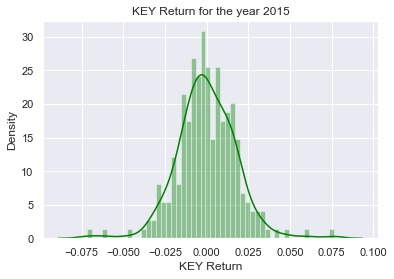

In [151]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['KEY Return'], color='green', bins=50 )
plt.title("KEY Return for the year 2015")

## Create a distplot using seaborn of the 2008 for CitiGroup

c:\users\nzrnm\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'C Return for the year 2008')

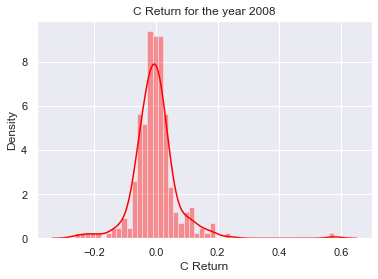

In [152]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50 )
plt.title("C Return for the year 2008")

 ## Imports

Now we will import plotly and cufflinks as additional visualization modules.

In [153]:
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

## Create a line plot showing Close price for each bank.

The plot below shows the Closing price for each stock from 2006 to 2016. For the first graph, we use pandas built in plotting library while the second graph we use the plotly library.

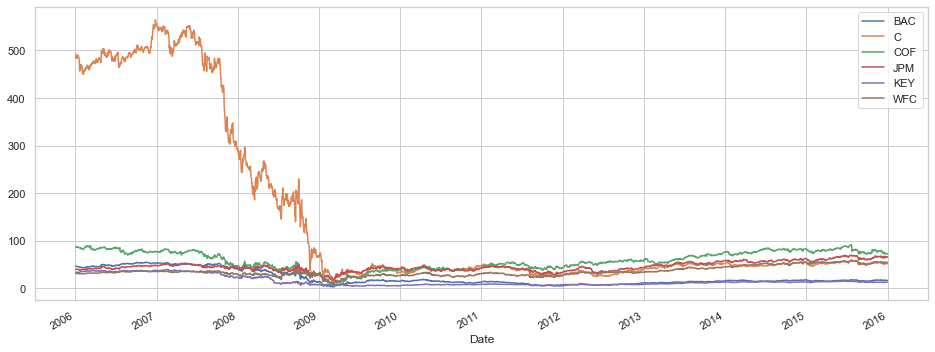

In [154]:
for tick in ticker:
    bank_stocks.loc['2006-01-01':'2015-12-31'][tick]['Close'].plot(label=tick, figsize=(16,6))
plt.legend()

In [155]:
bank_stocks.loc['2006-01-01':'2015-12-31'].xs(key = 'Close', axis=1, level='Stock Info').iplot()

# Moving Averages

### Plot the 30 day average against the Close Price for BofA stock for the year 2008

In [158]:
bank_stocks['BAC']

Stock Info,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,34.280807,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,33.916729,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,33.960411,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,33.909451,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,33.931290,15619400
...,...,...,...,...,...,...
2021-07-12,39.790001,40.810001,39.639999,40.630001,40.630001,42624500
2021-07-13,40.480000,40.480000,39.580002,39.860001,39.860001,54338100
2021-07-14,39.110001,39.549999,37.790001,38.860001,38.860001,105651700


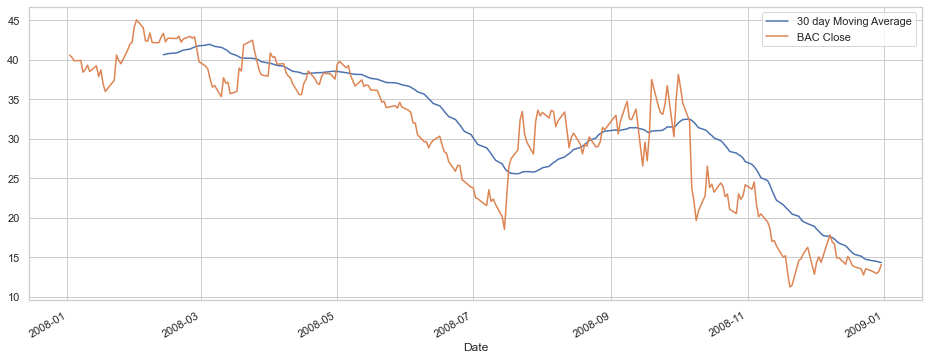

In [159]:
plt.figure(figsize=(16,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day Moving Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

### Create a heatmap of the correlation between the stock Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

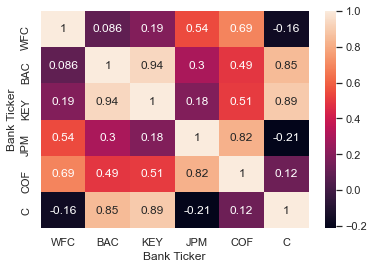

In [160]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

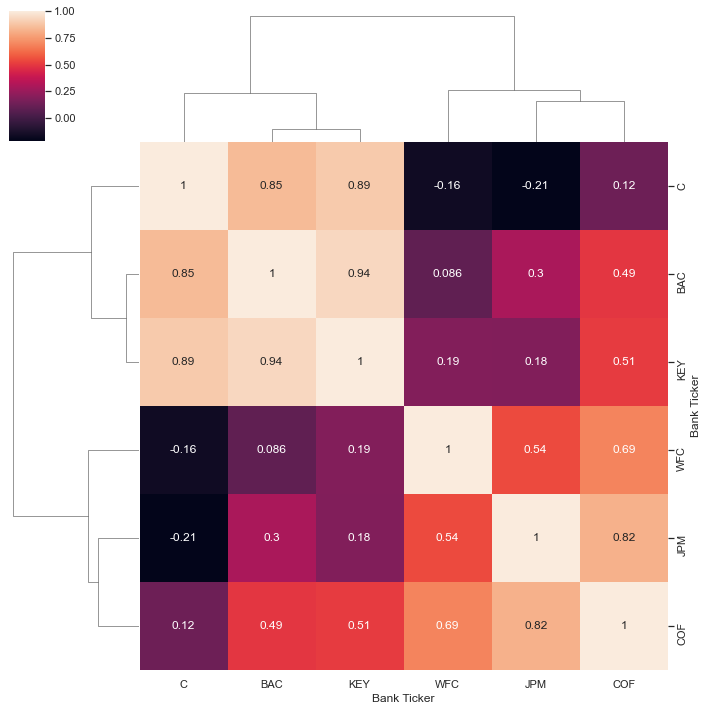

In [161]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)


### Create a candle plot of BofA stock from Jan 1st 2015 to Jan 1st 2016

In [162]:
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind='candle')